# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [2]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Get the size of the sample train data

In [4]:
x_train[0].shape

(28, 28)

Check the sample train data

In [5]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [6]:
y_train[333]

8

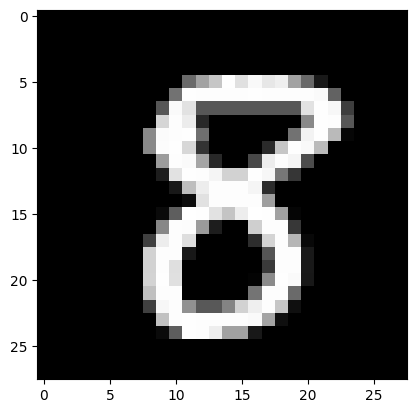

In [7]:
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [8]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [9]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [10]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [11]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [13]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 6s 8ms/step - loss: 0.5105 - accuracy: 0.8462 - val_loss: 0.1946 - val_accuracy: 0.9410
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2480 - accuracy: 0.9273 - val_loss: 0.1466 - val_accuracy: 0.9563
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2006 - accuracy: 0.9409 - val_loss: 0.1246 - val_accuracy: 0.9616
Epoch 4/30
469/469 [==============================] - 5s 11ms/step - loss: 0.1741 - accuracy: 0.9477 - val_loss: 0.1119 - val_accuracy: 0.9669
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1522 - accuracy: 0.9545 - val_loss: 0.1096 - val_accuracy: 0.9656
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1424 - accuracy: 0.9567 - val_loss: 0.0965 - val_accuracy: 0.9700
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1342 - accuracy: 0.9601 - val_loss: 0.0974 - val_accuracy: 0.9709
Epoch

Use Keras evaluate function to evaluate performance on the test set

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09503231197595596
Test accuracy: 0.9782999753952026


From the model evaluation, we can view that the model is performing considerably well with a test accuracy of 97%, whilst also maintaining low test lost of nearly 1%.

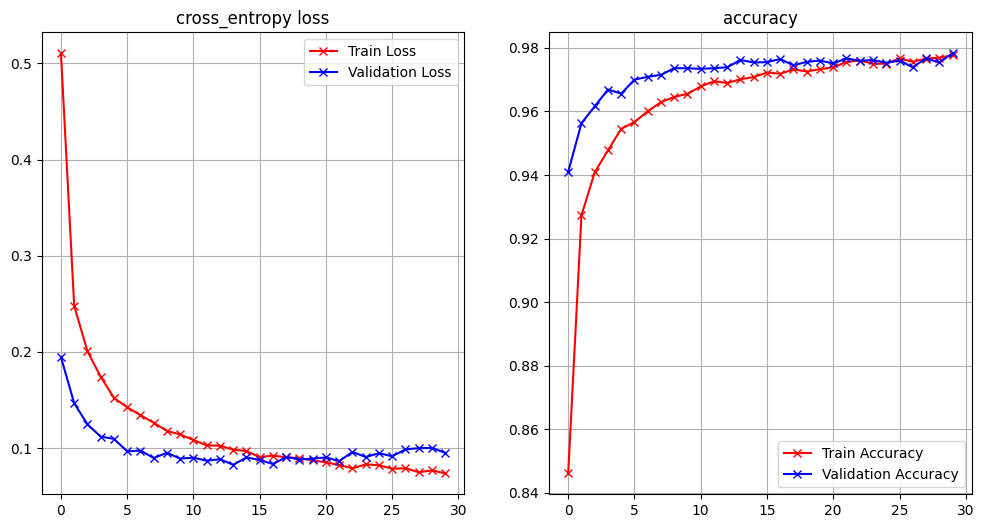

In [15]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result<Br> On the right we can view the accuracy of the model, being that as training went on we can see a steady increase up until closely to 0.97 or 97 %. On the left side we can see see the cross entropy loss, which by definition is the performance of the classification model, from this we can gather that the though in training the model was able to continously go lower in terms of loss, but as we observe in the validation loss we dont see the continous drop and at some point the cross entropy loss increased.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [16]:
model_1 = Sequential()
model_1.add(Dense(300, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(400, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10,activation='softmax'))

4. How many parameters does your model have? How does it compare with the previous modeL?

Answer: The number of parameters that the new model has remains the same as the previous model, being three (3) parameters. In terms of performance it can be seen that the accuracy is higher than the previous model.

In [17]:
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3433 - accuracy: 0.8954 - val_loss: 0.1282 - val_accuracy: 0.9600
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1621 - accuracy: 0.9512 - val_loss: 0.0945 - val_accuracy: 0.9697
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 0.1247 - accuracy: 0.9626 - val_loss: 0.0843 - val_accuracy: 0.9754
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1062 - accuracy: 0.9683 - val_loss: 0.0779 - val_accuracy: 0.9772
Epoch 5/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0966 - accuracy: 0.9714 - val_loss: 0.0748 - val_accuracy: 0.9787
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0865 - accuracy: 0.9747 - val_loss: 0.0679 - val_accuracy: 0.9798
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0795 - accuracy: 0.9766 - val_loss: 0.0795 - val_accuracy: 0.9790

In [18]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08096777647733688
Test accuracy: 0.9829999804496765


6. Use at least two regularization techniques and apply it to the new model (model_2)

In [33]:
from keras import regularizers

model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01), activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10,activation='softmax'))

In [34]:
from keras.callbacks import EarlyStopping
#Early Stop Regularizer
#For this Early Stop, we only put in 10 patience, patience being the indicator
#for the regularizer to stop running epochs as the performance had already
#starting going down or stopped increasing
earlystop= EarlyStopping(monitor='val_accuracy', patience=10)
learning_rate = .1
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 100
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[earlystop])

Epoch 1/100
469/469 [==============================] - 8s 16ms/step - loss: 1.0026 - accuracy: 0.8974 - val_loss: 0.4073 - val_accuracy: 0.9479
Epoch 2/100
469/469 [==============================] - 6s 12ms/step - loss: 0.3825 - accuracy: 0.9505 - val_loss: 0.2896 - val_accuracy: 0.9662
Epoch 3/100
469/469 [==============================] - 7s 14ms/step - loss: 0.3053 - accuracy: 0.9600 - val_loss: 0.2435 - val_accuracy: 0.9720
Epoch 4/100
469/469 [==============================] - 5s 12ms/step - loss: 0.2664 - accuracy: 0.9647 - val_loss: 0.2176 - val_accuracy: 0.9729
Epoch 5/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2447 - accuracy: 0.9681 - val_loss: 0.2036 - val_accuracy: 0.9735
Epoch 6/100
469/469 [==============================] - 5s 12ms/step - loss: 0.2242 - accuracy: 0.9708 - val_loss: 0.1963 - val_accuracy: 0.9734
Epoch 7/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2110 - accuracy: 0.9730 - val_loss: 0.1817 - val_accuracy:

Early Stop is a method of regularization in which it stops the training early upon seeing that the model is dips in performance, this is primarily good if the model has to do a large amount of iterations. Furthermore, this helps combat the problem of overfitting as it would stop training before it can start overfitting.

In [35]:
score1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

score2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.08096777647733688
Test accuracy: 0.9829999804496765
Test loss: 0.12454431504011154
Test accuracy: 0.9794999957084656


Model 2 being the one that I had customized and added different regularizers such as early stop and kernel regularizer proved to have more loss in and accuracy as compared to the first, being Model 1.

#### Conclusion

In this activity, we tackled on regularization and how it functions for our neural network. This allows us to avoid overfitting, as well as underfitting. There were a few foreign concepts that I had come across such as Dropout, and creating the neural network with a regularizer on. But some of the regularization methods that I had used such as Early Stopping is greatly helping when dealing with a large amount of epochs. Moreover this activity has helped me revisit concept such as overfitting and underfitting and its important when creating a model.